In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import datetime as datetime

In [60]:
# Read data
df = pd.read_csv("C:/Users/Sachin/Desktop/Sachin/CV/Lynx/NYC_TLC_Yellow_Taxi_Data-main/Yellow_Taxi_Assignment.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01-01-2018 12:02,01-01-2018 12:04,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,01-01-2018 12:26,01-01-2018 12:31,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,01-01-2018 01:28,01-01-2018 01:39,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,01-01-2018 08:51,01-01-2018 09:01,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,01-01-2018 01:00,01-01-2018 01:14,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,31-01-2023 00:11,31-01-2023 00:38,1.0,9.90,99.0,N,48,47,1,35.5,0.0,0.5,0.00,0.0,1.0,37.00,0.0,0.0
304974,2,31-01-2023 16:06,31-01-2023 16:52,1.0,8.27,1.0,N,87,75,2,44.3,2.5,0.5,0.00,0.0,1.0,50.80,2.5,0.0
304975,2,31-01-2023 15:31,31-01-2023 15:44,1.0,0.71,1.0,N,236,236,2,12.1,0.0,0.5,0.00,0.0,1.0,16.10,2.5,0.0
304976,1,31-01-2023 20:35,31-01-2023 20:42,1.0,1.80,1.0,N,141,170,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.0


Dataset contains 304978 rows and 19 columns


In [35]:
#Now, find the datatypes of the columns/ variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

In [36]:
# Find number of null values in dataset
df.isnull().sum()

# passenger_count has 9513, store_and_fwd_flag has 9513, congestion_surcharge has 72632 and airport_fee has 198761 null values

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            9513
trip_distance                 0
RatecodeID                 9513
store_and_fwd_flag         9513
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      72632
airport_fee              198761
dtype: int64

As per business understanding changing the data type of VendorID, RatecodeID, payment_type as those variables are supposed to be categorical variables

In [61]:
df['VendorID'] = df['VendorID'].astype('str')
df['RatecodeID'] = df['RatecodeID'].astype('str')
df['payment_type'] = df['payment_type'].astype('str')
#df['PULocationID'] = df['PULocationID'].astype('str')
#df['DOLocationID'] = df['DOLocationID'].astype('str')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  object 
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             304978 non-null  object 
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  object 
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

Find the summary of numerical variables. eg min & max values, mean e.t.c

In [25]:
df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Trip_duration
count,295465.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,232346.000000,106217.000000,304978
mean,1.479126,4.587589,13.510189,0.903506,0.492755,2.224064,0.390715,0.312725,19.050501,2.241650,0.085815,0 days 00:16:41.830522201
std,1.108255,434.226624,12.636651,1.185321,0.074023,2.765200,1.699547,0.110404,15.464014,0.791877,0.318628,0 days 00:59:54.205735005
min,0.000000,-16.860000,-197.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000,-1 days +23:15:52
25%,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000,0 days 00:06:36
50%,1.000000,1.730000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,0.000000,0 days 00:11:01
75%,2.000000,3.210000,15.000000,1.000000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,0.000000,0 days 00:18:03
max,6.000000,177247.400000,455.000000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000,0 days 23:59:52



1.   passenger_count - minimum value is 0 and max value is 6 with average of 1 
passenger. value '0' ( passenger count = 0) can be considered as either cancelled trip or mistake in the entry as its entered by the driver himself.

2.   trip_distance - minimum value is -16.86 which is not possible as trip distance will be greater than zero and it sould be treated. average distance is 4.58 and max distance is 177247 which is outliers and not possible. from excel, found that there are some trips which has wrong trip_distances which should be treated.

3.  PULocationID & DOLocationID - there are 265 destinations from which either trips has started or ended.

4. fare_amount - minimum fare_amount is -197 which is not possible, so value treatment should be done. maximum is 455 and average fare_amount is 13.51.

5. extra - minimum extra is -6 which is not possible, so value treatment should be done. maximum is 18.5 and average extra is 0.90

6. mta_tax - minimum mta_tax is -0.50 which is not possible, so value treatment should be done. maximum is 2.54 and average mta_tax is 0.49.

7. tip_amount - minimum tip_amount is -0.20 which is not possible, so value treatment should be done. maximum is 115.56 and average mta_tax is 2.22.

8. tolls_amount - minimum tolls_amount is -13.75 which is not possible, so value treatment should be done. maximum is 96.5 and average mta_tax is 0.39

9. improvement_surcharge - minimum improvement_surcharge is -1 which is not possible, so value treatment should be done. maximum is 1 and average mta_tax is 0.31.

10.   total_amount - minimum total_amount is -198.55 which is not possible, so value treatment should be done. maximum is 561.49 and average mta_tax is 19.05.

11.   congestion_surcharge - minimum congestion_surcharge is -2.5 which is not possible, so value treatment should be done. maximum is 2.75 and average mta_tax is 2.24.

12.   airport_fee - minimum airport_fee is -1.25 which is not possible, so value treatment should be done. maximum is 1.25 and average mta_tax is 0.085

Lets check how many records has each TPEP provider provided

Percentage of entries from VendorID - 1 (Creative Mobile Technologies. LLC) -  33.74 %
Percentage of entries from VendorID - 2 (VeriFone Inc) -  65.93 %
Percentage of entries from unknown VendorID - 4 -  0.16 %
Percentage of entries from unknown VendorID - 5 -  0.0 %
Percentage of entries from unknown VendorID - 6 -  0.17 %


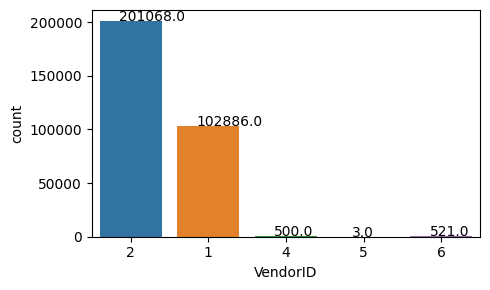

In [26]:
# EDA of VendorID

print("Percentage of entries from VendorID - 1 (Creative Mobile Technologies. LLC) - ", round(len(df[df['VendorID'] == "1"])/len(df) * 100, 2),'%')
print("Percentage of entries from VendorID - 2 (VeriFone Inc) - ", round(len(df[df['VendorID'] == "2"])/len(df) * 100, 2),'%')
print("Percentage of entries from unknown VendorID - 4 - ", round(len(df[df['VendorID'] == "4"])/len(df) * 100, 2),'%')
print("Percentage of entries from unknown VendorID - 5 - ", round(len(df[df['VendorID'] == "5"])/len(df) * 100, 2),'%')
print("Percentage of entries from unknown VendorID - 6 - ", round(len(df[df['VendorID'] == "6"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [5.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="VendorID", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Lets check how many records has been recorded per year

Starting date of tpep_pickup_datetime is -  01-01-2018 00:25
Ending date of tpep_pickup_datetime is -  31-12-2022 23:37
Starting date of tpep_dropoff_datetime is -  01-01-2018 00:38
Ending date of tpep_dropoff_datetime is -  31-12-2022 23:52


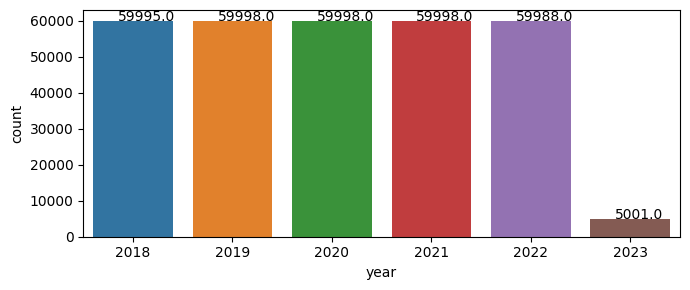

In [122]:
print( "Starting date of tpep_pickup_datetime is - ", df.tpep_pickup_datetime.min())
print( "Ending date of tpep_pickup_datetime is - ", df.tpep_pickup_datetime.max())

print( "Starting date of tpep_dropoff_datetime is - ", df.tpep_dropoff_datetime.min())
print( "Ending date of tpep_dropoff_datetime is - ", df.tpep_dropoff_datetime.max())

# EDA of Year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="year", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Equal number of trips can be seen from 2018 - 2022.
# Almost 5 years trip data is present in the dataset. from january 2028 - february 2023

Lets check how many passenger_count has been recorded per trip

Percentage of rides with 0 passenger -  1.81 %
Percentage of rides with 1 passengers -  70.47 %
Percentage of rides with 2 passengers -  14.24 %
Percentage of rides with 3 passengers -  3.82 %
Percentage of rides with 4 passengers -  1.68 %
Percentage of rides with 5 passengers -  2.94 %
Percentage of rides with 6 passengers -  1.91 %
Percentage of rides with blank passejnger count -  3.12 %


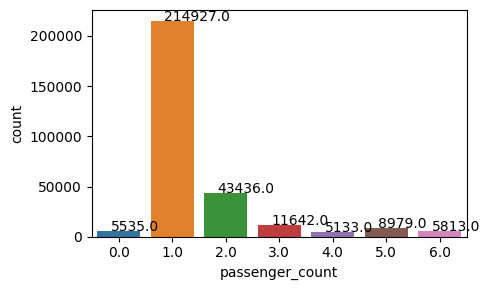

In [127]:
# EDA of passenger_count
print("Percentage of rides with 0 passenger - ", round(len(df[df['passenger_count'] == 0])/len(df) * 100, 2),'%')
print("Percentage of rides with 1 passengers - ", round(len(df[df['passenger_count'] == 1])/len(df) * 100, 2),'%')
print("Percentage of rides with 2 passengers - ", round(len(df[df['passenger_count'] == 2])/len(df) * 100, 2),'%')
print("Percentage of rides with 3 passengers - ", round(len(df[df['passenger_count'] == 3])/len(df) * 100, 2),'%')
print("Percentage of rides with 4 passengers - ", round(len(df[df['passenger_count'] == 4])/len(df) * 100, 2),'%')
print("Percentage of rides with 5 passengers - ", round(len(df[df['passenger_count'] == 5])/len(df) * 100, 2),'%')
print("Percentage of rides with 6 passengers - ", round(len(df[df['passenger_count'] == 6])/len(df) * 100, 2),'%')
print("Percentage of rides with blank passejnger count - ", round(len(df[df['passenger_count'].isna() == True])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [5.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="passenger_count", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 70% of trips are with one passenger and 14.24 % with 2 passengers. 3.12% of trips has blank values in passenger_count   

There is a clear trend that most of the time, only 1 passenger is there on trip. we can assume that this trend happens during working hours.we can also clarify that later using trip time

Lets check trip_distance that has been recorded per trip

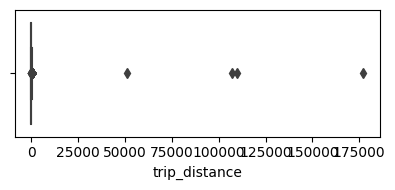

In [35]:
# Check for outliers in the continuos data - Univariate analysis of "trip_distance" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="trip_distance")
plt.show()

# It is clear that there are some outliers in trip_distance which should be treated. mean trip distance is 4

Lets analyze number of trips per rate code

Percentage of trips with rate code 1 (Standard rate) -  93.54 %
Percentage of trips with rate code 2 (JFK) -  2.42 %
Percentage of trips with rate code 3 (Newark) -  0.2 %
Percentage of trips with rate code 4 (Nassau or Westchester) -  0.1 %
Percentage of trips with rate code 5 (Negotiated fare) -  0.53 %
Percentage of trips with rate code 6 (Group ride) -  0.0 %
Percentage of trips with rate code 99 (Unknown rate code) -  0.0 %
Percentage of trips with rate code blanks -  3.12 %


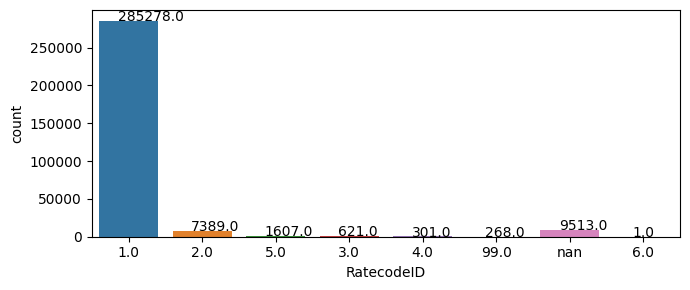

In [62]:
# EDA of RatecodeID
print("Percentage of trips with rate code 1 (Standard rate) - ", round(len(df[df['RatecodeID'] == "1.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 2 (JFK) - ", round(len(df[df['RatecodeID'] == "2.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 3 (Newark) - ", round(len(df[df['RatecodeID'] == "3.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 4 (Nassau or Westchester) - ", round(len(df[df['RatecodeID'] == "4.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 5 (Negotiated fare) - ", round(len(df[df['RatecodeID'] == "5.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 6 (Group ride) - ", round(len(df[df['RatecodeID'] == "6.0"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code 99 (Unknown rate code) - ", round(len(df[df['RatecodeID'] == "99"])/len(df) * 100, 2),'%')
print("Percentage of trips with rate code blanks - ", round(len(df[df['RatecodeID'] == "nan"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="RatecodeID", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 93.5% of trips are with rate code 1 (Standard rate). only 2.4 % for rate code 2 (JFK) and 3.12% for unknown/blank trips 

Lets check store_and_fwd_flag that has been recorded per trip

Percentage of trips with store_and_fwd_flag = Y (store and forward trip) -  1.0 %
Percentage of trips with store_and_fwd_flag = N (not a store and forward trip) -  95.88 %


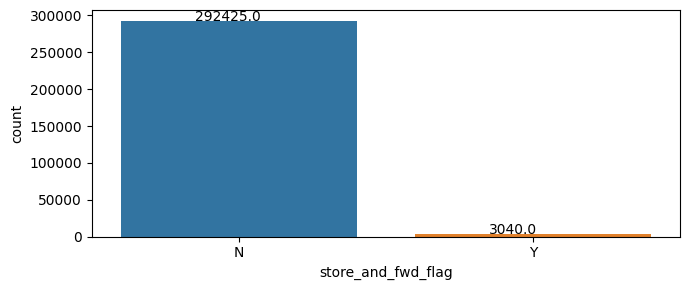

In [65]:
# EDA of store_and_fwd_flag
print("Percentage of trips with store_and_fwd_flag = Y (store and forward trip) - ", round(len(df[df['store_and_fwd_flag'] == "Y"])/len(df) * 100, 2),'%')
print("Percentage of trips with store_and_fwd_flag = N (not a store and forward trip) - ", round(len(df[df['store_and_fwd_flag'] == "N"])/len(df) * 100, 2),'%')


plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="store_and_fwd_flag", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 95.88% of trips are not a store and forward trip. only 1.0 % of trips are store_and_fwd_flag 

Percentage of trips with payment_type 1 Credit card -  71.04 %
Percentage of trips with payment_type 2 Cash -  24.89 %
Percentage of trips with payment_type 3 No charge -  0.58 %
Percentage of trips with payment_type 4 Dispute -  0.37 %
Percentage of trips with payment_type 5 Unknown -  0.0 %
Percentage of trips with payment_type 6 Voided trip -  0.0 %


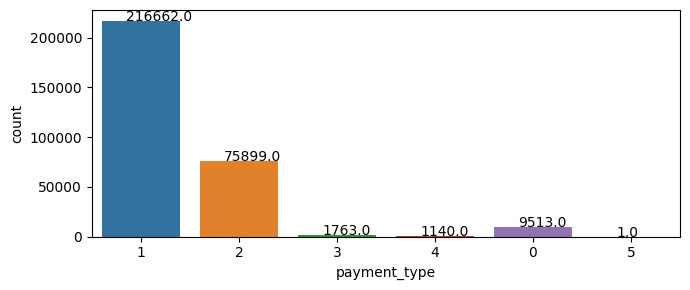

In [68]:
# EDA of payment_type
print("Percentage of trips with payment_type 1 Credit card - ", round(len(df[df['payment_type'] == "1"])/len(df) * 100, 2),'%')
print("Percentage of trips with payment_type 2 Cash - ", round(len(df[df['payment_type'] == "2"])/len(df) * 100, 2),'%')
print("Percentage of trips with payment_type 3 No charge - ", round(len(df[df['payment_type'] == "3"])/len(df) * 100, 2),'%')
print("Percentage of trips with payment_type 4 Dispute - ", round(len(df[df['payment_type'] == "4"])/len(df) * 100, 2),'%')
print("Percentage of trips with payment_type 5 Unknown - ", round(len(df[df['payment_type'] == "5"])/len(df) * 100, 2),'%')
print("Percentage of trips with payment_type 6 Voided trip - ", round(len(df[df['payment_type'] == "6"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="payment_type", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 71.04% of trips are through Credit card payments, followed by Cash with 24.89%. rest of them are very low in numbers

There is a clear trend that most of the customers prefer credit card payment ( 71.04 %) followed by cash payment (24.89 %)

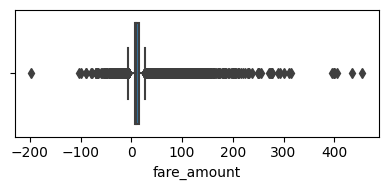

In [69]:
# Check for outliers in the continuos data - Univariate analysis of "fare_amount" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="fare_amount")
plt.show()

# It is clear that there are many outliers in fare_amount which should be treated. The negative values should be removed. mean fare_amount is 13.51

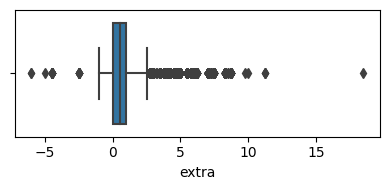

In [71]:
# Check for outliers in the continuos data - Univariate analysis of "extra" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="extra")
plt.show()

# It is clear that there are many outliers in extra which should be treated. The negative values should be removed. mean extra is 0.93

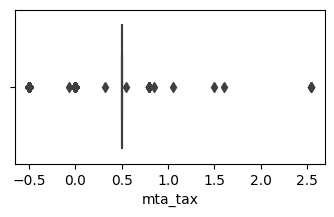

In [11]:
# Check for outliers in the continuos data - Univariate analysis of "mta_tax" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="mta_tax")
plt.show()

# It is clear that there are many outliers in mta_tax which should be treated. The negative values should be removed. mean extra is 0.492

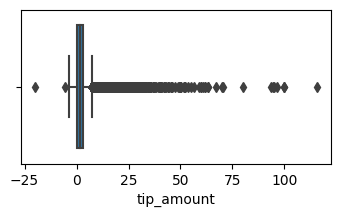

In [12]:
# Check for outliers in the continuos data - Univariate analysis of "tip_amount" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="tip_amount")
plt.show()

# It is clear that there are many outliers in tip_amount which should be treated. The negative values should be removed. mean tip_amount is 2.22

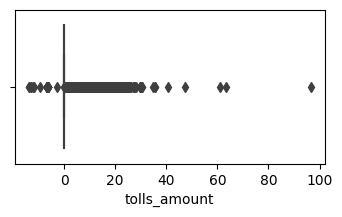

In [13]:
# Check for outliers in the continuos data - Univariate analysis of "tolls_amount" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="tolls_amount")
plt.show()

# It is clear that there are many outliers in tolls_amount which should be treated. The negative values should be removed. mean tip_amount is 19.05

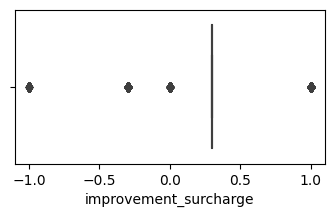

In [14]:
# Check for outliers in the continuos data - Univariate analysis of "improvement_surcharge" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="improvement_surcharge")
plt.show()

# It is clear that there are many outliers in improvement_surcharge which should be treated. The negative values should be removed. mean tip_amount is 2.24

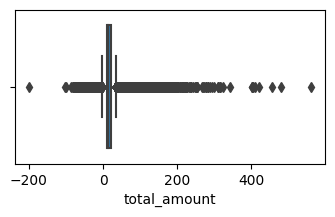

In [15]:
# Check for outliers in the continuos data - Univariate analysis of "total_amount" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="total_amount")
plt.show()

# It is clear that there are many outliers in tolls_amount which should be treated. The negative values should be removed. mean total_amount is 19.05

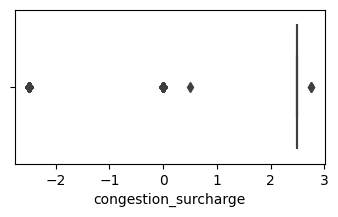

In [16]:
# Check for outliers in the continuos data - Univariate analysis of "congestion_surcharge" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="congestion_surcharge")
plt.show()

# It is clear that there are many outliers in congestion_surcharge which should be treated. The negative values should be removed. mean congestion_surcharge is 2.24

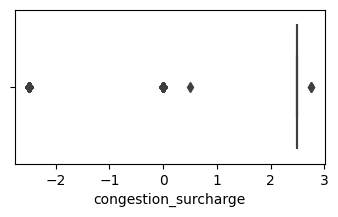

In [17]:
# Check for outliers in the continuos data - Univariate analysis of "airport_fee" variable
fig, ax = plt.subplots(figsize=(4, 2)) 
# drawing the plot
sns.boxplot(data=df, x="airport_fee")
plt.show()

# It is clear that there are many outliers in airport_fee which should be treated. The negative values should be removed. mean airport_fee is 0.085

Feature engineering


In [62]:
# Read taxi zone data

df_Zone = pd.read_csv("C:/Users/Sanjay/Desktop/Sachin/CV/Lynx/NYC_TLC_Yellow_Taxi_Data-main/taxi+_zone_lookup.csv")

# Merge the pick up and drop off location from zone table to main table
df3 = pd.merge(df, df_Zone, left_on=['PULocationID'],right_on=['LocationID'], how='left')
df3.rename(columns = {'Borough':'PUBorough'}, inplace = True)
df3.rename(columns = {'Zone':'PUZone'}, inplace = True)
df3.rename(columns = {'service_zone':'PUservice_zone'}, inplace = True)

df3 = pd.merge(df3, df_Zone, left_on=['DOLocationID'],right_on=['LocationID'], how='left')
df3.rename(columns = {'Borough':'DOBorough'}, inplace = True)
df3.rename(columns = {'Zone':'DOZone'}, inplace = True)
df3.rename(columns = {'service_zone':'DOservice_zone'}, inplace = True)
df3

df = df3.copy()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,LocationID_x,PUBorough,PUZone,PUservice_zone,LocationID_y,DOBorough,DOZone,DOservice_zone
0,2,01-01-2018 12:02,01-01-2018 12:04,1.0,0.53,1.0,N,142,163,1,...,NaN,NaN,142,Manhattan,Lincoln Square East,Yellow Zone,163,Manhattan,Midtown North,Yellow Zone
1,2,01-01-2018 12:26,01-01-2018 12:31,1.0,1.05,1.0,N,140,236,1,...,NaN,NaN,140,Manhattan,Lenox Hill East,Yellow Zone,236,Manhattan,Upper East Side North,Yellow Zone
2,2,01-01-2018 01:28,01-01-2018 01:39,4.0,1.83,1.0,N,211,158,1,...,NaN,NaN,211,Manhattan,SoHo,Yellow Zone,158,Manhattan,Meatpacking/West Village West,Yellow Zone
3,1,01-01-2018 08:51,01-01-2018 09:01,1.0,2.30,1.0,N,249,4,2,...,NaN,NaN,249,Manhattan,West Village,Yellow Zone,4,Manhattan,Alphabet City,Yellow Zone
4,2,01-01-2018 01:00,01-01-2018 01:14,1.0,3.06,1.0,N,186,142,1,...,NaN,NaN,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,142,Manhattan,Lincoln Square East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304973,1,31-01-2023 00:11,31-01-2023 00:38,1.0,9.90,99.0,N,48,47,1,...,0.0,0.0,48,Manhattan,Clinton East,Yellow Zone,47,Bronx,Claremont/Bathgate,Boro Zone
304974,2,31-01-2023 16:06,31-01-2023 16:52,1.0,8.27,1.0,N,87,75,2,...,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone,75,Manhattan,East Harlem South,Boro Zone
304975,2,31-01-2023 15:31,31-01-2023 15:44,1.0,0.71,1.0,N,236,236,2,...,2.5,0.0,236,Manhattan,Upper East Side North,Yellow Zone,236,Manhattan,Upper East Side North,Yellow Zone
304976,1,31-01-2023 20:35,31-01-2023 20:42,1.0,1.80,1.0,N,141,170,2,...,2.5,0.0,141,Manhattan,Lenox Hill West,Yellow Zone,170,Manhattan,Murray Hill,Yellow Zone


Percentage of pick ups from Manhattan -  90.03 %
Percentage of pick ups from Queens -  6.86 %
Percentage of pick ups from Brooklyn -  1.38 %


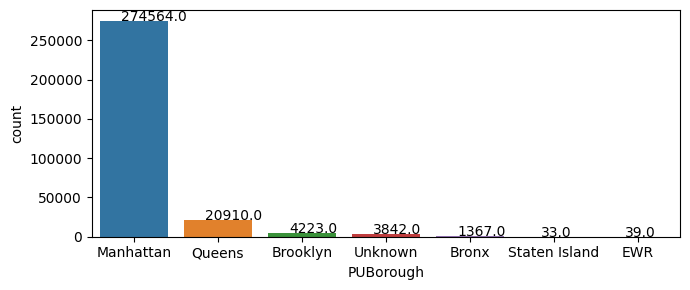

In [50]:
# EDA of payment_type
print("Percentage of pick ups from Manhattan - ", round(len(df[df['PUBorough'] == "Manhattan"])/len(df) * 100, 2),'%')
print("Percentage of pick ups from Queens - ", round(len(df[df['PUBorough'] == "Queens"])/len(df) * 100, 2),'%')
print("Percentage of pick ups from Brooklyn - ", round(len(df[df['PUBorough'] == "Brooklyn"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="PUBorough", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 90.03% of trip bookings are from Manhattan

Percentage of drop offs from Manhattan -  87.98 %
Percentage of drop offs from Queens -  5.11 %
Percentage of drop offs from Brooklyn -  4.4 %


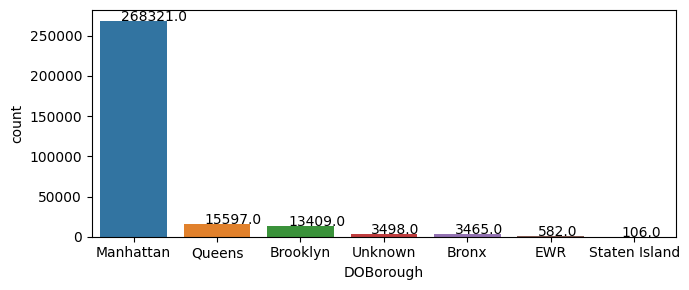

In [51]:
# EDA of payment_type
print("Percentage of drop offs from Manhattan - ", round(len(df[df['DOBorough'] == "Manhattan"])/len(df) * 100, 2),'%')
print("Percentage of drop offs from Queens - ", round(len(df[df['DOBorough'] == "Queens"])/len(df) * 100, 2),'%')
print("Percentage of drop offs from Brooklyn - ", round(len(df[df['DOBorough'] == "Brooklyn"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="DOBorough", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 90.03% of trip bookings are to Manhattan area itself

It is clear that manhattan is the main area/zone at which most of the taxi services are occuring.

Percentage of pick ups from Yellow Zone -  86.67 %
Percentage of pick ups from Boro Zone -  6.58 %
Percentage of pick ups from Airports -  5.48 %
Percentage of pick ups from EWR -  0.01 %


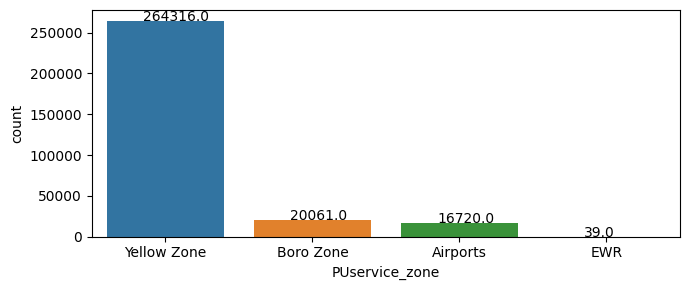

In [57]:
# EDA of pick up service_zone
print("Percentage of pick ups from Yellow Zone - ", round(len(df[df['PUservice_zone'] == "Yellow Zone"])/len(df) * 100, 2),'%')
print("Percentage of pick ups from Boro Zone - ", round(len(df[df['PUservice_zone'] == "Boro Zone"])/len(df) * 100, 2),'%')
print("Percentage of pick ups from Airports - ", round(len(df[df['PUservice_zone'] == "Airports"])/len(df) * 100, 2),'%')
print("Percentage of pick ups from EWR - ", round(len(df[df['PUservice_zone'] == "EWR"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="PUservice_zone", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 86.67% of trip bookings are from Yellow Zone, followed by Boro Zone (6.58%) and Airports (5.48%)

Percentage of drop off to Yellow Zone -  81.81 %
Percentage of drop off to Boro Zone -  15.09 %
Percentage of drop off to Airports -  1.76 %
Percentage of drop off to EWR -  0.19 %


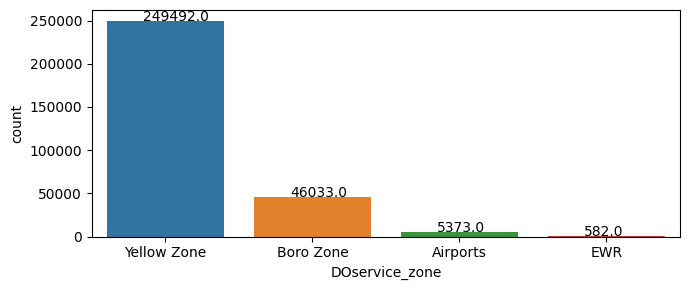

In [58]:
# EDA of Drop off service_zone
print("Percentage of drop off to Yellow Zone - ", round(len(df[df['DOservice_zone'] == "Yellow Zone"])/len(df) * 100, 2),'%')
print("Percentage of drop off to Boro Zone - ", round(len(df[df['DOservice_zone'] == "Boro Zone"])/len(df) * 100, 2),'%')
print("Percentage of drop off to Airports - ", round(len(df[df['DOservice_zone'] == "Airports"])/len(df) * 100, 2),'%')
print("Percentage of drop off to EWR - ", round(len(df[df['DOservice_zone'] == "EWR"])/len(df) * 100, 2),'%')

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="DOservice_zone", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 81.81% of trip bookings are from Yellow Zone, followed by Boro Zone (15.09%) and Airports (1.76%)

From the analysis , it is clear that there are many missing and incorrect information in the data, which we need to find the reason and solution for those errors.
It seems that some of the trips contains passenger count zero and blanks. 
When looked for observations with blank 'passenger count', their RatecodeID, store_and_fwd_flag, payment_type are also blanks, which leads us to an assumption that those are cancelled trips
where as the passenger count zero can be considered as incorrect entry by the driver.

There is a clear trend that most of the trips happens on Yellow zone and especially manhattan area

In [67]:
# Find the number of trips with passenger count less than or equal to zero

print("Number of entries from VendorID - 1 (Creative Mobile Technologies. LLC) - ", len(df[df['VendorID'] == "1"]))
print("Number of entries from VendorID - 2 (VeriFone Inc) - ", (len(df[df['VendorID'] == "2"])))
print(df[df['passenger_count'] <= 0].groupby(['VendorID'])['VendorID'].count())

# This indicates that out of 102886 trips by VendorID - 1 (Creative Mobile Technologies. LLC), 5518 trips had zero  passengers and 
# out of 102886 trips by VendorID - 2 (VeriFone Inc), 17 trips had zero passengers and 

Number of entries from VendorID - 1 (Creative Mobile Technologies. LLC) -  102886
Number of entries from VendorID - 2 (VeriFone Inc) -  201068
VendorID
1    5518
2      17
Name: VendorID, dtype: int64


In [69]:
# Find the number of trips with passenger count less than or equal to zero

print("Number of entries from VendorID - 1 (Creative Mobile Technologies. LLC) - ", len(df[df['VendorID'] == "1"]))
print("Number of entries from VendorID - 2 (VeriFone Inc) - ", (len(df[df['VendorID'] == "2"])))
print("Number of entries from unknown vendor 5 - ", (len(df[df['VendorID'] == "5"])))
print("Number of entries from unknown vendor 6 - ", (len(df[df['VendorID'] == "6"])))

print(df[df['passenger_count'].isna() == True].groupby(['VendorID'])['VendorID'].count())

# This indicates that out of 102886 trips by VendorID - 1 (Creative Mobile Technologies. LLC), 1261 trips has blank passenger count 
# Out of 7728 trips by VendorID - 2 (VeriFone Inc), 7728 trips has blank passenger count
# Out of 3 trips by unknown vendor 5, 3 trips has blank passenger count
# Out of 521 trips by unknown vendor 6, 521 trips has blank passenger count

Number of entries from VendorID - 1 (Creative Mobile Technologies. LLC) -  102886
Number of entries from VendorID - 2 (VeriFone Inc) -  201068
Number of entries from unknown vendor 5 -  3
Number of entries from unknown vendor 6 -  521
VendorID
1    1261
2    7728
5       3
6     521
Name: VendorID, dtype: int64


From the above analysis, it is clear that vendor 5 and 6 data is incorrect & cannot used for further analysis.
3% of data provided by VendorID - 2 contains blank passenger count (7728/201068 * 100 = 3 %)
5.36% ofdata provided by VendorID - 2 contains 1 passenger count (5518/102886 * 100 = 5.36 %)

Extract year and month from tpep_pickup_datetime to identify the year and month with most number of trips

In [130]:

for index, row in df.iterrows():
  datetimeobj=datetime.strptime(row['tpep_pickup_datetime'], "%d-%m-%Y %H:%M")
  df.at[index, 'year'] = datetimeobj.year
  df.at[index, 'month'] = datetimeobj.month
  df.at[index, 'hour'] = datetimeobj.hour


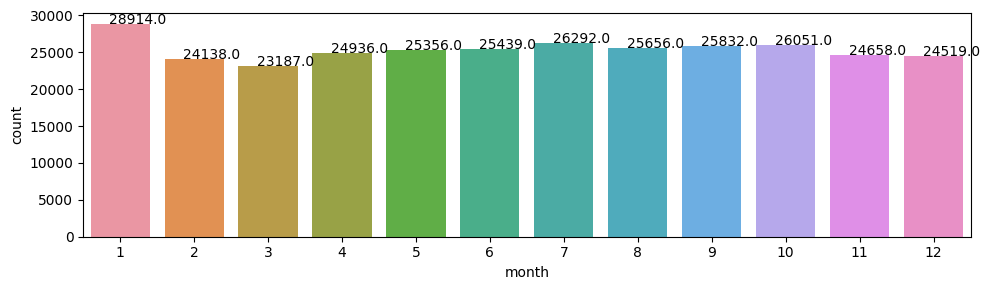

In [78]:
# EDA of months
plt.rcParams["figure.figsize"] = [10.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# january has more trips compared to any other month and february has the least

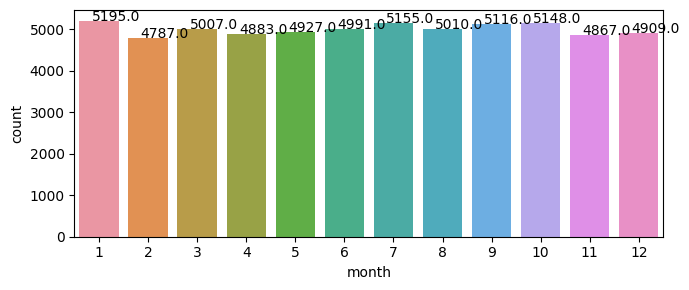

In [80]:
# EDA of 2018 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2018])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 2018 shows a similiar pattern of the overall trip count 

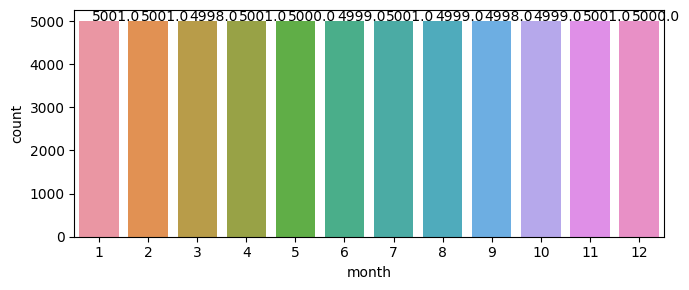

In [121]:
# EDA of 2019 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2019])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 2019 shows a similiar pattern of the overall trip count 

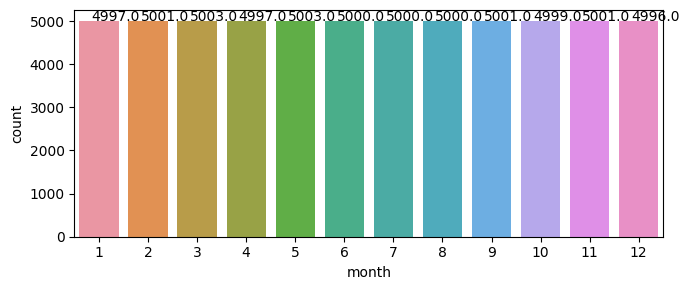

In [120]:
# EDA of 2020 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2020])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# in 2020 march had very low number of trips compared to any other months.

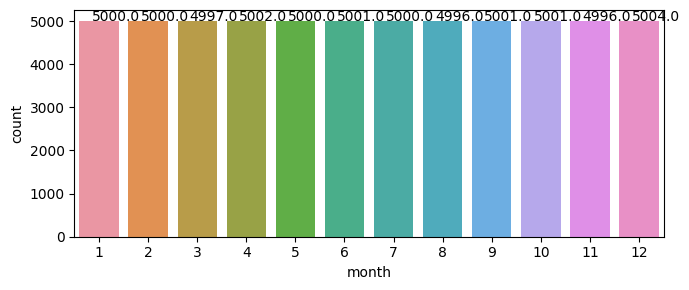

In [119]:
# EDA of 2021 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2021])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 2021 shows a similiar pattern of the overall trip count 

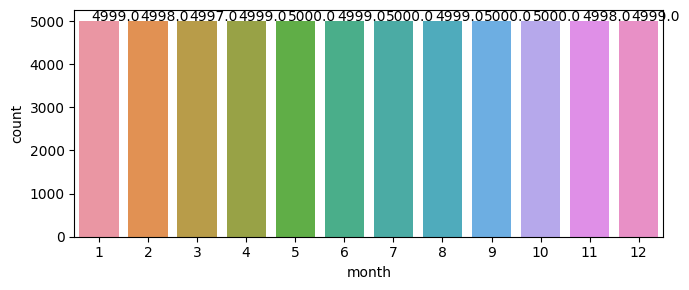

In [118]:
# EDA of 2022 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2022])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# 2022 shows a similiar pattern of the overall trip count 

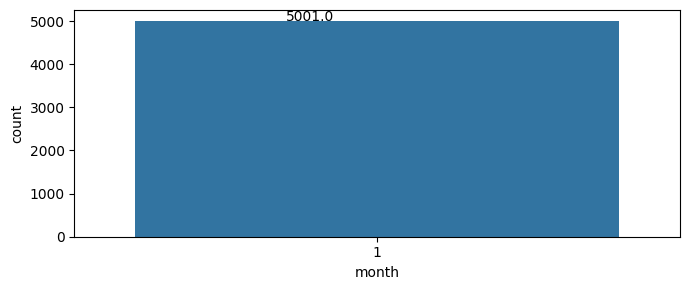

In [117]:
# EDA of 2023 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="month", data=df[df['year'] == 2023])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# since we have only january data in 2023, we have almost equal number of trips compared to other years.

Cluster the hour based on different time and analyze the number of trips

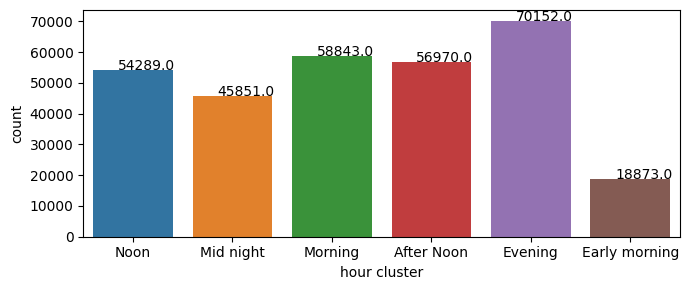

In [143]:
for index, row in df.iterrows():
  if row['hour'] <= 4:
      df.at[index, 'hour cluster'] = 'Mid night'
  elif (row['hour'] > 4) & (row['hour'] <= 7):
      df.at[index, 'hour cluster'] = 'Early morning'
  elif (row['hour'] > 7) & (row['hour'] <= 11):
      df.at[index, 'hour cluster'] = 'Morning'
  elif (row['hour'] > 11) & (row['hour']<= 14):
      df.at[index, 'hour cluster'] = 'Noon'
  elif (row['hour'] > 14) & (row['hour']<= 17):
      df.at[index, 'hour cluster'] = 'After Noon'
  elif (row['hour'] > 17) & (row['hour'] <= 21):
      df.at[index, 'hour cluster'] = 'Evening'
  elif (row['hour'] > 21) & (row['hour'] <= 23):
      df.at[index, 'hour cluster'] = 'Mid night'

# EDA of 2023 year
plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="hour cluster", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))



Most of the trips are occuring during evening section and least trips during early morning. Day time has a very good number of trips occuring

There are some amount fields in which we can see negative values which is not possible. also a very high value as well. so need to treat it and then do an analysis.

Identify the columns which should not be less than zero, find the vendor who gave the data

In [144]:
non_negative_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for column in non_negative_columns:
    print(df[df[column] <= 0].groupby(['VendorID'])['VendorID'].count())

VendorID
1    2157
2    1728
4       6
Name: VendorID, dtype: int64
VendorID
1      55
2    1234
6       2
Name: VendorID, dtype: int64
VendorID
1     19196
2    115465
4       270
5         3
6       519
Name: VendorID, dtype: int64
VendorID
1     710
2    2605
4       2
6       2
Name: VendorID, dtype: int64
VendorID
1    31632
2    59584
4      147
5        1
6      521
Name: VendorID, dtype: int64
VendorID
1     97835
2    188385
4       467
5         2
6       521
Name: VendorID, dtype: int64
VendorID
1      52
2    1257
6       2
Name: VendorID, dtype: int64
VendorID
1      24
2    1221
Name: VendorID, dtype: int64
VendorID
1     7833
2    15272
4       14
Name: VendorID, dtype: int64
VendorID
1    29480
2    69390
Name: VendorID, dtype: int64



based on above comparison we can conclude that both the vendor are making mistakes in providing the records. But vendor 2(VeriFone Inc) is making more mistakes as compared to vendor 1(Creative Mobile Technologies) as you can see above.

Impute incorrect data and find statistical values of non negative columns.

Vendor 6 has 521 trips but passenger count, RatecodeID,store_and_fwd_flag and payment_type for all those trips are blanks. 
Also the trip datesare between from August 2020 and December 2022

Venor 5 has only 3 trips . 1 in 2018 and 2 trips in 2021, so we can remove those trips as well from the dataset

In [14]:
df[non_negative_columns]

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0.53,3.50,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,1.05,6.00,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,1.83,9.50,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,2.30,10.00,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,3.06,12.50,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
304973,6.50,27.75,0.0,0.5,0.00,0.0,0.3,35.70,0.0,0.0
304974,6.50,27.75,2.5,0.5,0.00,0.0,0.3,35.70,2.5,0.0
304975,0.71,12.10,0.0,0.5,0.00,0.0,0.3,16.10,2.5,0.0
304976,1.80,10.70,2.5,0.5,0.00,0.0,0.3,15.70,2.5,0.0


In [64]:
df = df[df['VendorID'] != "5"]
df = df[df['VendorID'] != "6"]

# replace all the negative values in those columns by zero
non_negative_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for index, row in df[non_negative_columns].iterrows():
    for column in non_negative_columns:
        if row[column] <= 0:
            df.at[index, column] = 0

# Outlier treatment using inter quartile range method

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = (Q3 - Q1)
    lower_range = (Q1 - (1.5 * IQR))
    upper_range = (Q3 + (1.5 * IQR))
    return lower_range,upper_range


for column in non_negative_columns:
    lowerbound,upperbound = outlier_treatment(df[column])

    for index, row in df.iterrows():
        if row[column] <= lowerbound:
            df.at[index, column] = lowerbound
        elif row[column] >= upperbound:
            df.at[index, column] = upperbound

<Figure size 640x480 with 0 Axes>

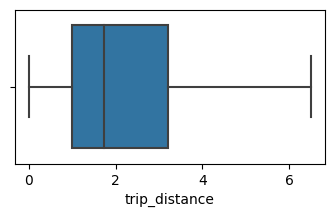

<Figure size 640x480 with 0 Axes>

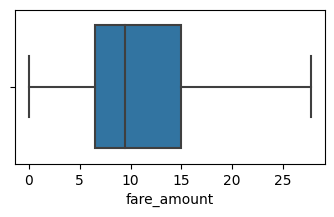

<Figure size 640x480 with 0 Axes>

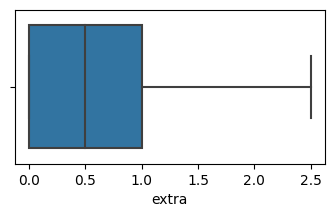

<Figure size 640x480 with 0 Axes>

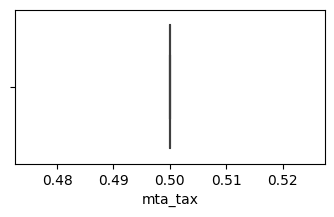

<Figure size 640x480 with 0 Axes>

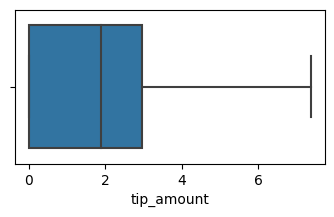

<Figure size 640x480 with 0 Axes>

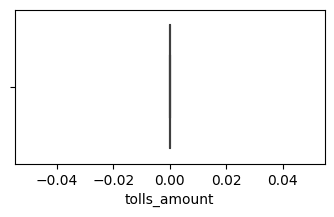

<Figure size 640x480 with 0 Axes>

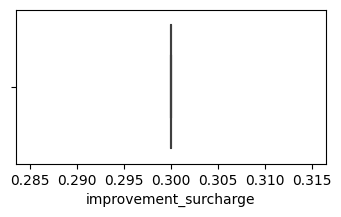

<Figure size 640x480 with 0 Axes>

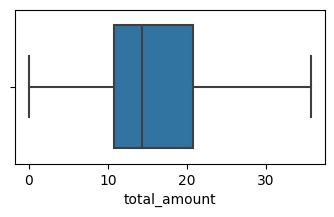

<Figure size 640x480 with 0 Axes>

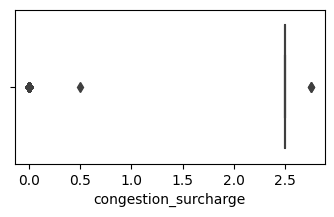

<Figure size 640x480 with 0 Axes>

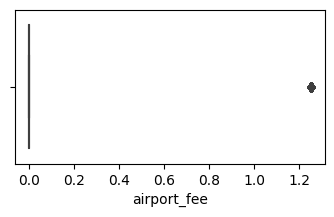

In [18]:
# Check for outliers in the continuos data - after outlier treatment

for i in non_negative_columns:
    plt.figure()
    fig, ax = plt.subplots(figsize=(4, 2)) 
    # drawing the plot
    sns.boxplot(data=df, x=i)
    plt.show()


# It is clear that all the outliers have been removed

In [23]:
df[non_negative_columns].describe()

# we can see the average value of all the numeric columns

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,304454.000000,304454.000000,304454.000000,304454.0,304454.000000,304454.0,3.044540e+05,304454.000000,232346.000000,106217.000000
mean,2.429159,11.911287,0.815983,0.5,2.040233,0.0,3.000000e-01,16.989357,2.251237,0.086462
std,1.919362,7.198187,0.992235,0.0,1.972576,0.0,1.110225e-16,8.569596,0.748350,0.317180
min,0.000000,0.000000,0.000000,0.5,0.000000,0.0,3.000000e-01,0.000000,0.000000,0.000000
25%,1.000000,6.500000,0.000000,0.5,0.000000,0.0,3.000000e-01,10.800000,2.500000,0.000000
50%,1.720000,9.500000,0.500000,0.5,1.890000,0.0,3.000000e-01,14.300000,2.500000,0.000000
75%,3.200000,15.000000,1.000000,0.5,2.950000,0.0,3.000000e-01,20.760000,2.500000,0.000000
max,6.500000,27.750000,2.500000,0.5,7.375000,0.0,3.000000e-01,35.700000,2.750000,1.250000


In [59]:
print(df.groupby(['VendorID'])['passenger_count'].mean())
# All the vendors have trips with almost equal average passengers. But vedor 2 seems to have more passnegers

print(df.groupby(['VendorID'])['trip_distance'].mean())
# Average trip_distance for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['fare_amount'].mean())
# Average fare_amount for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['extra'].mean())
# Average extra for trips of TPEP provider 1 is greater compared to others


VendorID
1    1.190483
2    1.561775
4    1.046000
Name: passenger_count, dtype: float64
VendorID
1    2.278558
2    2.506804
4    2.194580
Name: trip_distance, dtype: float64
VendorID
1    11.539650
2    12.102781
4    11.377300
Name: fare_amount, dtype: float64
VendorID
1    1.763094
2    0.332568
4    0.326000
Name: extra, dtype: float64


In [31]:
print(df.groupby(['VendorID'])['mta_tax'].mean())
# Average mta_tax for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['tip_amount'].mean())
# Average tip_amount for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['tolls_amount'].mean())
# Average tolls_amount for each TPEP provider is almost similiar

VendorID
1    0.5
2    0.5
4    0.5
Name: mta_tax, dtype: float64
VendorID
1    1.942108
2    2.090559
4    1.993970
Name: tip_amount, dtype: float64
VendorID
1    0.0
2    0.0
4    0.0
Name: tolls_amount, dtype: float64


In [32]:
print(df.groupby(['VendorID'])['improvement_surcharge'].mean())
# Average improvement_surcharge for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['total_amount'].mean())
# Average total_amount for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['congestion_surcharge'].mean())
# Average congestion_surcharge for each TPEP provider is almost similiar

print(df.groupby(['VendorID'])['airport_fee'].mean())
# Average airport_fee for each vendor is almost similiar

VendorID
1    0.3
2    0.3
4    0.3
Name: improvement_surcharge, dtype: float64
VendorID
1    16.421553
2    17.284210
4    15.256820
Name: total_amount, dtype: float64
VendorID
1    2.240812
2    2.256272
4    2.244526
Name: congestion_surcharge, dtype: float64
VendorID
1    0.072985
2    0.092095
4         NaN
Name: airport_fee, dtype: float64


plot the correlation graph between numeric variables

In [65]:
non_negative_columns.append('passenger_count')
df[non_negative_columns] = df[non_negative_columns].fillna(0)
df['passenger_count'] = df['passenger_count'].astype('int')
df[non_negative_columns].corr()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,passenger_count
trip_distance,1.000000,0.908870,-0.019455,NaN,0.470618,NaN,NaN,0.887035,-0.095887,0.304648,-0.017382
fare_amount,0.908870,1.000000,-0.028312,NaN,0.493320,NaN,NaN,0.970808,-0.131959,0.310019,-0.027893
extra,-0.019455,-0.028312,1.000000,NaN,0.022331,NaN,NaN,0.033102,0.325918,0.004977,-0.107100
mta_tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip_amount,0.470618,0.493320,0.022331,NaN,1.000000,NaN,NaN,0.613884,0.082509,0.207037,-0.003106
tolls_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement_surcharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_amount,0.887035,0.970808,0.033102,NaN,0.613884,NaN,NaN,1.000000,0.008903,0.306330,-0.032684
congestion_surcharge,-0.095887,-0.131959,0.325918,NaN,0.082509,NaN,NaN,0.008903,1.000000,-0.053954,0.022918
airport_fee,0.304648,0.310019,0.004977,NaN,0.207037,NaN,NaN,0.306330,-0.053954,1.000000,0.006128


It is clear that trip_distance and fare_amount and total_amount is highly correlated
also tip_amount is correlated with total_amount.
Now lets see the congestion_surcharge and airport fee on different areas

In [82]:
df.groupby(['DOBorough'])['congestion_surcharge'].mean()
# Manhattan has the highest congestion_surcharge followed by queens and unknown zones

DOBorough
Bronx            0.641723
Brooklyn         0.948126
EWR              0.098797
Manhattan        1.832236
Queens           0.955354
Staten Island    0.448113
Unknown          0.607122
Name: congestion_surcharge, dtype: float64

In [83]:
df.groupby(['DOBorough'])['airport_fee'].mean()
# Queens has the highest airport_fee for trips. 

DOBorough
Bronx            0.067995
Brooklyn         0.114887
EWR              0.021478
Manhattan        0.019676
Queens           0.120026
Staten Island    0.106132
Unknown          0.078304
Name: airport_fee, dtype: float64

In [70]:
df.groupby(['PUservice_zone'])['congestion_surcharge'].mean()
# Yellow zone has more congestion_surcharge and manhattan comes under yellow zone

PUservice_zone
Airports       0.956056
Boro Zone      0.532513
EWR            0.000000
Yellow Zone    1.866794
Name: congestion_surcharge, dtype: float64

In [74]:
df.groupby(['PUBorough'])['trip_distance'].mean()
# trips pn Bronx area has more trip_distance, followed by brooklyn

PUBorough
Bronx            4.093884
Brooklyn         3.663725
EWR              0.223077
Manhattan        2.158654
Queens           5.601859
Staten Island    5.006061
Unknown          2.561813
Name: trip_distance, dtype: float64

In [72]:
df.groupby(['PUBorough'])['fare_amount'].mean()
# Bronx has the highest fare_amount for trips. 

PUBorough
Bronx            20.389868
Brooklyn         18.009003
EWR              25.019231
Manhattan        10.823580
Queens           24.036694
Staten Island    23.393939
Unknown          13.979581
Name: fare_amount, dtype: float64

In [76]:
df.groupby(['PUBorough'])['fare_amount'].mean()
# trips pn Bronx area has more trip_distance, followed by brooklyn

PUBorough
Bronx            20.389868
Brooklyn         18.009003
EWR              25.019231
Manhattan        10.823580
Queens           24.036694
Staten Island    23.393939
Unknown          13.979581
Name: fare_amount, dtype: float64

In [73]:
df.groupby(['PUservice_zone'])['fare_amount'].mean()
# Airports has the highest fare_amount for trips. 

PUservice_zone
Airports       25.685444
Boro Zone      14.769164
EWR            25.019231
Yellow Zone    10.795127
Name: fare_amount, dtype: float64

In [77]:
df.groupby(['PUBorough'])['extra'].mean()
# Manhattan has the highest extra followed by queens and brooklyn

PUBorough
Bronx            0.467849
Brooklyn         0.510881
EWR              0.025641
Manhattan        0.839778
Queens           0.643376
Staten Island    0.257576
Unknown          0.481632
Name: extra, dtype: float64

In [80]:
df.groupby(['DOBorough'])['tip_amount'].mean()
# More tips were provided for the trips to EWR and Queens

DOBorough
Bronx            1.534590
Brooklyn         3.137813
EWR              5.495103
Manhattan        1.924354
Queens           3.016034
Staten Island    2.074387
Unknown          2.366393
Name: tip_amount, dtype: float64

From all the above analysis, i have come to the below conclusions

1. The trips data is between january 2018 and january 2023 ( 5 year data)
2. Most of the trips data is provided by the major TPEP provider VeriFone Inc and Creative Mobile Technologies
3. Eventhough more data is provided by VeriFone Inc, it has so many incorrect data compared to Creative Mobile Technologies
4. Evenythough there was only 500 trips provided by vendor 4, all the data was correct and no missing data was there. So it os highly suggested to install vendor 4 TPEP providers on cabs to improve data quality

5. Most of the trips contain only 1 passenger.
6. Average trip distance is 2.42 miles
7. Most of the (97% ) of trips standard rate trips
8. Most of the trip datas are not stored in vehicle memmory. they were send direclty.
9. Yellow zone, mainly manhattan had most number of trips followed by queens and brooklyn
10. 71.04 % of customers preferred credit card payment followed by cash payment (24.5 %)

11. Even though more trips were on Manhattan, queens (yellow zone), all those trips were short trips and the trip distance & trip amount were also short. Trips from Bronx and brooklyn were longer trips and hence more trip amount.
12. More tips were provided for the trips to EWR and Queens
13. Congestion surcharge is more in manhattan(yellow zone) and airport fee is more in queens.